### Assignment 1 solutions 
By Ankit Jha
CSE- B

## Question1
![40.png](40.png)

In [56]:
nutrients <- matrix ( c(400, 1200, 800, 110, 570, 340, 90, 30, 60), nrow=3, ncol=3, byrow=TRUE)
need <- matrix ( c(8800, 3380, 1020), nrow=3, byrow= FALSE)
solve(nutrients)

ERROR: Error in solve.default(nutrients): system is computationally singular: reciprocal condition number = 7.89492e-18


As it comes out, nutrients is a singular matrix i.e. there exists a linear dependence between the given elements. By observation we can find out that 
vitamin C + 2* Calcium = Vitamin A 

In [55]:
# So removing Calcium 
#nutrients <- nutrients[1:2,1:3]
#print(nutrients)
# Bad approach

In [57]:
asvd=svd(nutrients)
adiag = asvd$d
au=asvd$u
av=asvd$v 

In [59]:
# now that we have svd to our disposal, time to calculate the inverse
# https://www.ecse.rpi.edu/~qji/CV/svd_review.pdf
adiaginv = 1/adiag
adiaginv = diag(adiaginv) # creating a diagnal matrix 
adiaginv

0.0006092972,0.000000000,0.000000e+00
0.0000000000,0.009305992,0.000000e+00
0.0000000000,0.000000000,7.767516e+13


In [62]:
# Now calculating A inverse 
nutrientinv = au %*% adiaginv
nutrientinv = nutrientinv %*% t(au)
nutrientinv

8.630574e+12,-1.726115e+13,-1.726115e+13
-1.726115e+13,3.452230e+13,3.452230e+13
-1.726115e+13,3.452230e+13,3.452230e+13


In [63]:
# Now calculating the final values 
nutrientinv %*% need

6
-12
4


## Question 2 
![41.png](41.png)

In [66]:
# Deleting all variables of prev answer 
rm (list=ls())

In [68]:
# Carete a matrix A 4*4
A<- matrix(c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16), nrow=4, ncol=4, byrow=TRUE) 
A

1,2,3,4
5,6,7,8
9,10,11,12
13,14,15,16


In [69]:
# Extract a submatrix B exclsuing 1st row and 1st column 
B<- A[2:4,2:4]
B

6,7,8
10,11,12
14,15,16


In [73]:
# Put transpose of B in place of B in A
B_ <- t(B)
A[2:4,2:4]=B_[,]
A

1,2,3,4
5,6,10,14
9,7,11,15
13,8,12,16


## Question 3
![42.png](42.png)

In [74]:
# Deleting all variables of prev answer 
rm (list=ls())

In [75]:
FML_marks <- c(12,23,41,61,85,15,35,41,69,99,8,32,50,72,90,8,21,55,80,95,40,45,75,28,58,78,60)
FML_marks

[1] 12 23 41 61 85 15 35 41 69 99  8 32 50 72 90  8 21 55 80 95 40 45 75 28 58
[26] 78 60

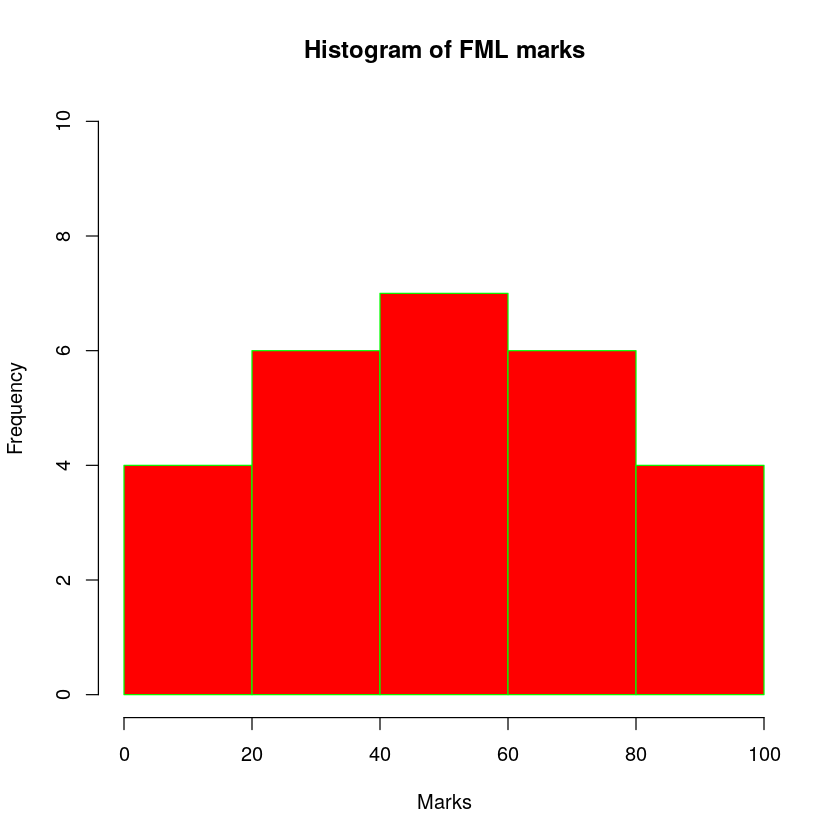

In [84]:
hist(x=FML_marks,
    main="Histogram of FML marks",
    col="red",
    breaks=5, #Breaking
    border="green",
    xlab="Marks",
    ylim=c(0,10),
    xlim=c(0,100))

In [92]:
# https://stat.ethz.ch/pipermail/r-help/2012-July/319703.html
# We need to count frequencies over a range 
a=seq(0,5)
a=a*20
cut=cut(FML_marks, breaks=a)
cut

[1] (0,20]   (20,40]  (40,60]  (60,80]  (80,100] (0,20]   (20,40]  (40,60] 
 [9] (60,80]  (80,100] (0,20]   (20,40]  (40,60]  (60,80]  (80,100] (0,20]  
[17] (20,40]  (40,60]  (60,80]  (80,100] (20,40]  (40,60]  (60,80]  (20,40] 
[25] (40,60]  (60,80]  (40,60] 
Levels: (0,20] (20,40] (40,60] (60,80] (80,100]

In [97]:
FML_freq= as.data.frame(table(cut))
FML_freq

cut,Freq
"(0,20]",4
"(20,40]",6
"(40,60]",7
"(60,80]",6
"(80,100]",4


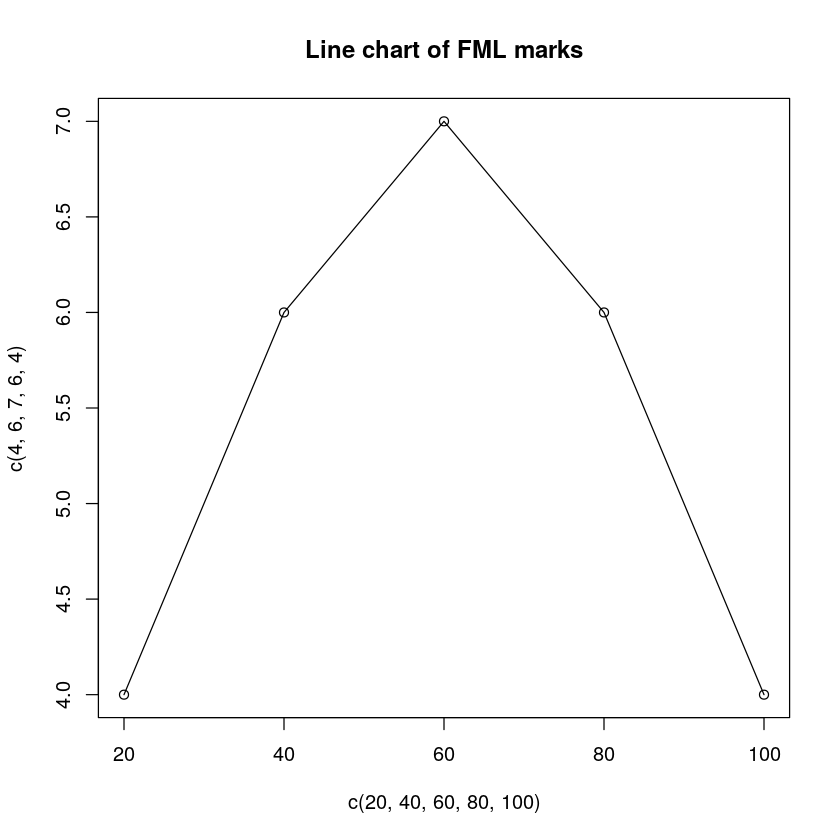

In [108]:
plot(y= c(4,6,7,6,4),x=c(20,40,60,80,100),type="o",main="Line chart of FML marks")
# Solve this issue here 

## Question 4 
![43.png](43.png)

In [109]:
# Deleting all variables of prev answer 
rm (list=ls())

In [116]:
Language <- c("Hindi", "English", "Bengali", "Telugu", "Marathi", "Tamil", "Urdu", "Kannada",
             "Gujarati", "Odia", "Malayalam", "Sanskrit")
Population <- c(422048642, 226449, 83369769, 74002856, 71936894, 60793814, 5153611, 37924011, 
               46091617, 33017446, 33066392, 14135)
table<- data.frame(Language, Population)
head(table)

Language,Population
Hindi,422048642
English,226449
Bengali,83369769
Telugu,74002856
Marathi,71936894
Tamil,60793814


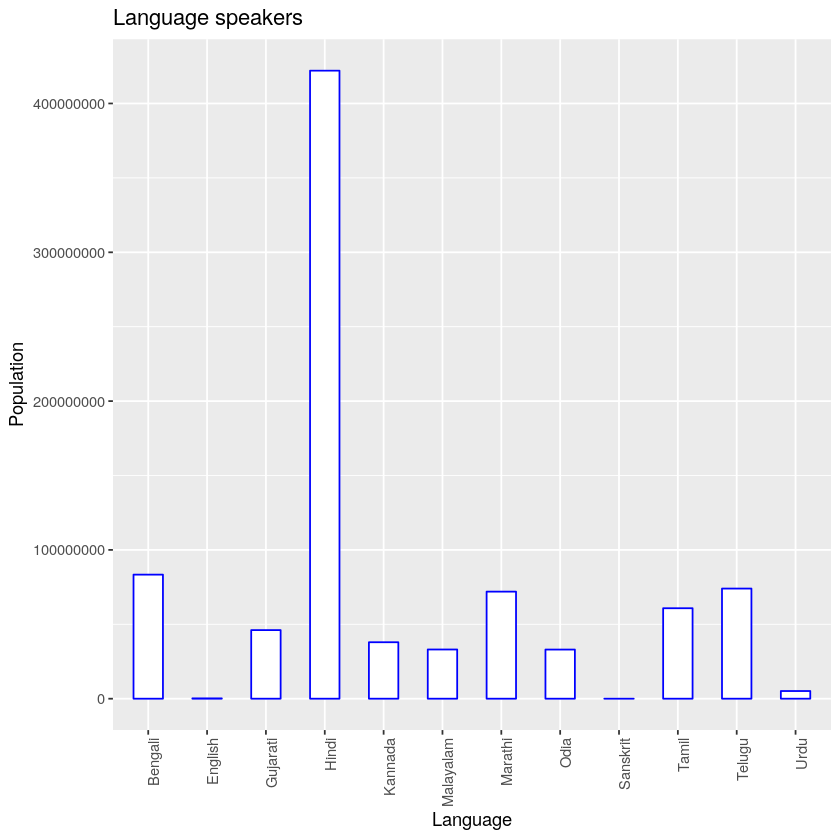

In [132]:
library(ggplot2)
# remove stupid scientific notation 
options(scipen=10000) 
p<-ggplot(data=table, aes(x=Language, y=Population)) +
  geom_bar(stat="identity", color="blue", fill="white",width=0.5)+
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
ggtitle("Language speakers")
p

In [133]:
install.packages("plotrix")
library(plotrix)

Installing package into ‘/home/brainsick/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


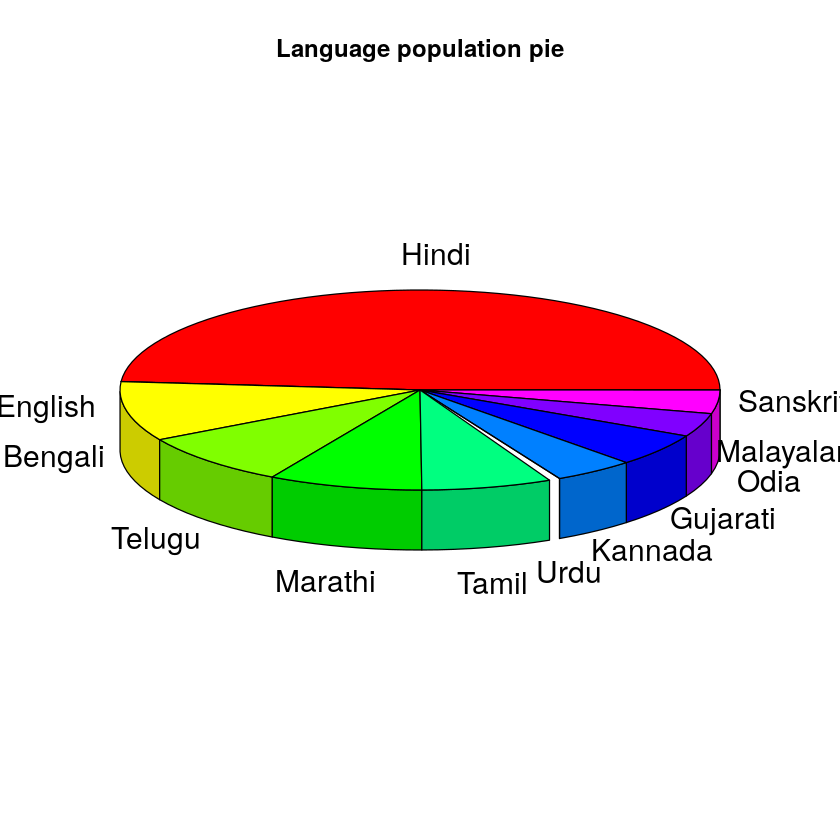

In [143]:
pie3D(Population, labels= Language, main="Language population pie")
# I hate plotrix. Will find alternative 